In [1]:
from IPython.display import HTML

HTML('''
<script src="https://ajax.googleapis.com/ajax/libs/jquery/3.3.1/jquery.min.js"></script>
<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()">
<input type="submit" value=" Clustering Algorithms " class="bg-success btn-md btn btn-info btn-block" >
</form>''')  

# `Clustering Algorithms `

## `1. K-Means Clustering Algorithm`

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

1. The centroids of the K clusters, which can be used to label new data
2. Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents. 

In [2]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0]

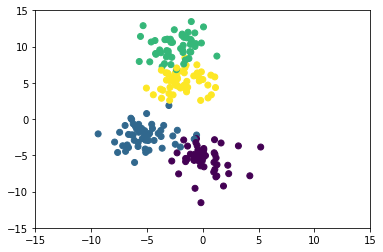

In [4]:
# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.show()

In [5]:
# import KMeans
from sklearn.cluster import KMeans

In [6]:
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(points);

In [7]:
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points)

[[-2.40167949 10.17352695]
 [ 0.05161133 -5.35489826]
 [-1.92101646  5.21673484]
 [-5.56465793 -2.34988939]]


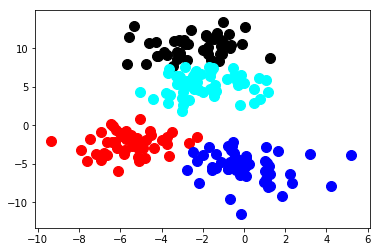

In [8]:
#plot
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=100, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=100, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=100, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=100, c='cyan')
plt.show()

## `2. Agglomerative Hierarchical Clustering`

Agglomerative hierarchical clustering is a bottom-up clustering method where clusters have sub-clusters, which in turn have sub-clusters, etc. The classic example of this is species taxonomy. Gene expression data might also exhibit this hierarchical quality (e.g. neurotransmitter gene families). Agglomerative hierarchical clustering starts with every single object (gene or sample) in a single cluster. Then, in each successive iteration, it agglomerates (merges) the closest pair of clusters by satisfying some similarity criteria, until all of the data is in one cluster.

The hierarchy within the final cluster has the following properties:

1. Clusters generated in early stages are nested in those generated in later stages.

2. Clusters with different sizes in the tree can be valuable for discovery.



In [9]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

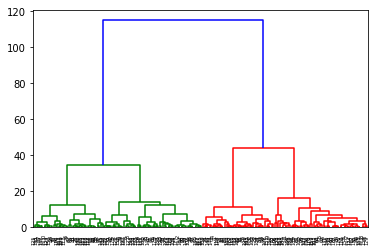

In [10]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(points, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(points)

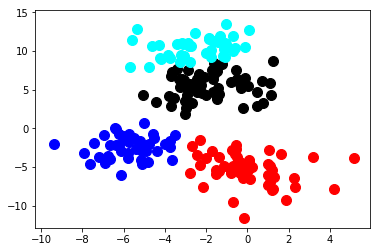

In [11]:
plt.scatter(points[y_hc ==0,0], points[y_hc == 0,1], s=100, c='red')
plt.scatter(points[y_hc==1,0], points[y_hc == 1,1], s=100, c='black')
plt.scatter(points[y_hc ==2,0], points[y_hc == 2,1], s=100, c='blue')
plt.scatter(points[y_hc ==3,0], points[y_hc == 3,1], s=100, c='cyan')
plt.show()